<a href="https://colab.research.google.com/github/149189/Image-Classification-with-CIFAR-10-/blob/main/Image_Classification_with_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [3]:
train_images = train_images/255
test_images = test_images/255

In [4]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


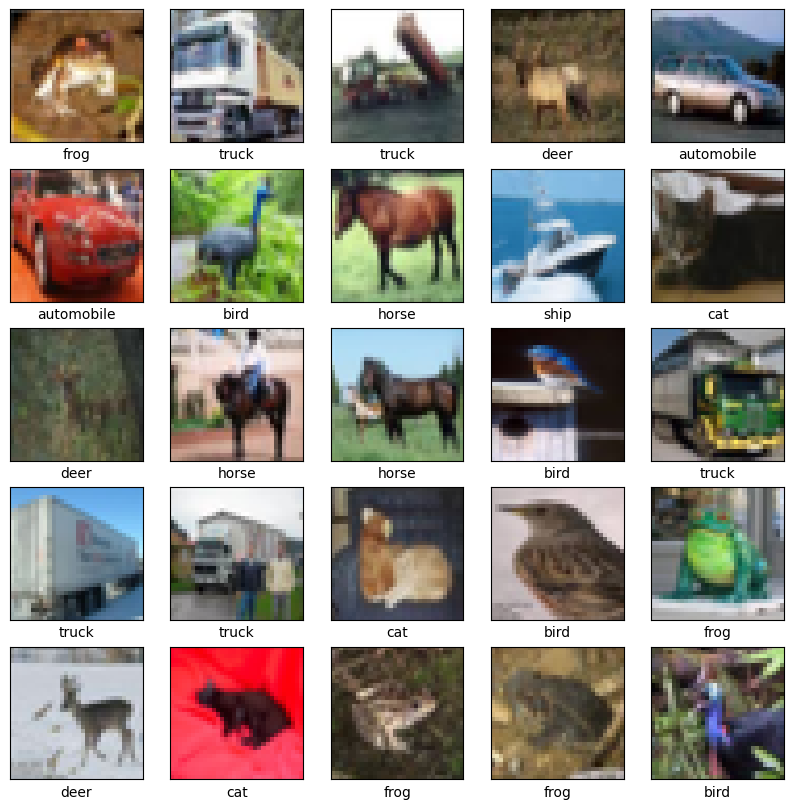

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_images,train_labels,epochs=100,validation_data=(test_images,test_labels))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2135 - loss: 2.0760 - val_accuracy: 0.3784 - val_loss: 1.6774
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3854 - loss: 1.6432 - val_accuracy: 0.4375 - val_loss: 1.5273
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4462 - loss: 1.5080 - val_accuracy: 0.4868 - val_loss: 1.4057
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4891 - loss: 1.4022 - val_accuracy: 0.5238 - val_loss: 1.3219
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5209 - loss: 1.3159 - val_accuracy: 0.5482 - val_loss: 1.2568
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5487 - loss: 1.2515 - val_accuracy: 0.5704 - val_loss: 1.2009
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5725 - loss: 1.1957 - val_accuracy: 0.5607 - val_loss: 1.2139
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5940 - los

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print(f"\nTest Accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.6923 - loss: 2.5280

Test Accuracy: 0.692300021648407


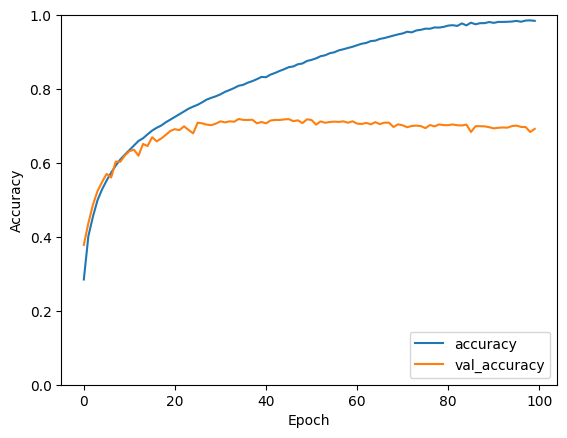

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
import numpy as np

In [16]:
print(class_names[np.argmax(predictions[0])])

cat


Text(0.5, 1.0, 'Predicted:dog')

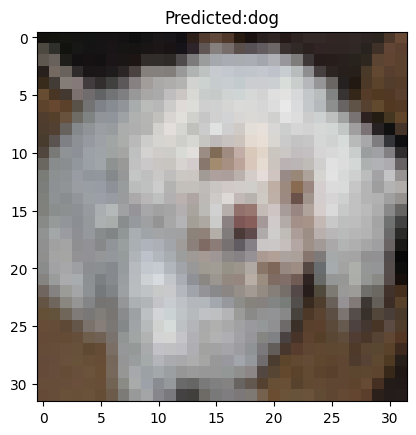

In [22]:
plt.figure()
plt.imshow(test_images[1000],cmap=plt.cm.binary)
plt.title(f'Predicted:{class_names[np.argmax(predictions[1000])]}')